<a href="https://colab.research.google.com/github/marioandrededeus/Time-Series-Analysis/blob/modelos_TS_Thiago/TS_Thiago_Proj_Integrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#from google.colab import files
#uploaded = files.upload()

Saving 4-VendasTelepWeek-Rev3.csv to 4-VendasTelepWeek-Rev3.csv


Semana 1 de 2019: 19.611328
Semana 2 de 2019: 27.673984
Semana 3 de 2019: 9.834235
Semana 4 de 2019: 18.847724
Semana 5 de 2019: 23.837344
Semana 6 de 2019: 37.823083
Semana 7 de 2019: 21.808190
Semana 8 de 2019: 13.793194
Semana 9 de 2019: 17.778182
Semana 10 de 2019: 11.763167
Semana 11 de 2019: 21.748152
Semana 12 de 2019: 15.733136
-------------------
Mean Absolute Error -  8.702456503471213


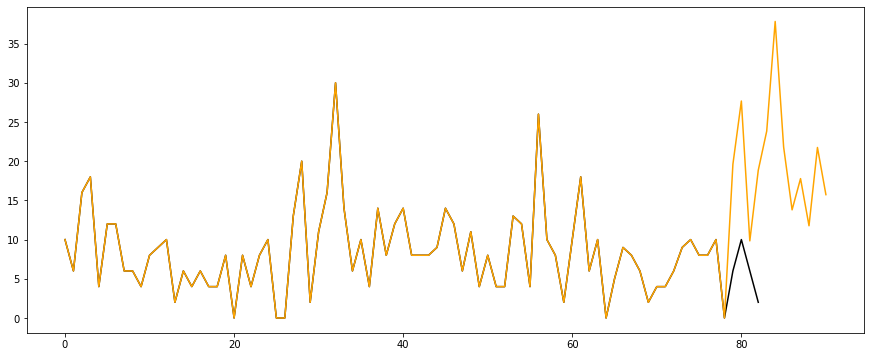

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error
rcParams['figure.figsize'] = 15, 6

data = pd.read_csv('4-VendasTelepWeek-Rev3.csv', delimiter = ',')

#Substiuir o numero pela variavel do Codigo do Produto
Codigo_produto = 1

#Periodo
Semana_ini = 26 #inicio de 2018
Semana_fim = 110 #final do dataset - Predic 5 semana pra tras


#Preparando os dados
df = data.loc[data['Codigo'] == Codigo_produto]
df1 = df.T.reset_index()
df1.columns = ["Semana","Quantidade"]

#Dataset para predict
ts = df1[1:][Semana_ini:Semana_fim-5] #reduzindo 5 semanas para comparar com o semana real.
ts = ts['Quantidade'].values.astype(int)
ts = pd.Series(ts)

#Dataset para comparacao real
ts2 = df1[1:][Semana_ini:Semana_fim]
ts2 = ts2['Quantidade'].values.astype(int)
ts2 = pd.Series(ts2)

#Funcao para inversao
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
weeks_in_year = 52


#model:
model = ARIMA(ts, order=(1, 1, 1))  
results = model.fit(disp=-1) 

#Forecast para 12 semanas
forecast = results.forecast(steps=12)[0]

# invert the differenced forecast to something usable
history = [x for x in ts.values]

week = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, weeks_in_year)
	print('Semana %d de 2019: %f' % (week, inverted))
	history.append(inverted)
	week += 1
 
#plots dos resultados
plt.plot(ts2, color='black')
plt.plot(history, color='orange')
MAE = mean_absolute_error(results.fittedvalues, ts.values[1:])
print('-------------------')
print('Mean Absolute Error - ', MAE)